<a href="https://colab.research.google.com/github/as791/Brain-Tumor-Segmentation-BRaTS-18/blob/master/Main_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connecting Google Drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
# os.chdir('/content/drive/My Drive/cs446_project/Multimodal-Brain-Tumor-Segmentation/Dataset')

Mounted at /content/drive


#Loading data from mri scans

In [ ]:
!pip install SimpleITK

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [ ]:
import SimpleITK as sitk 
from tqdm import tqdm
import numpy as np
from keras.utils import to_categorical,normalize


#Loading saved data for usage

In [ ]:
import numpy as np
from tqdm import tqdm

# Pre-Processing of data 

# U-net + dice loss 

## Loading Data

In [ ]:
import os
os.chdir('/content/drive/My Drive/cs446_project')

In [ ]:
import numpy as np
from keras.utils import to_categorical,normalize


In [ ]:
#below is written by lin
#this will cut the padded image to its origin size
def cutimage(image, newH, newW, newD):
    # image(H, W, D, 4)
    padHL = (image.shape[0] - newH) // 2
    padHR = padHL + newH
    padWL = (image.shape[1] - newW) // 2
    padWR = padWL + newW
    padDL = (image.shape[2] - newD) // 2
    padDR = padDL + newD
    toret = image[padHL:padHR,padWL:padWR,padDL:padDR,...]
    return toret
#this will return a larger image 
def padimage(image, targH, targW=192, targD=192):
    HL = (targH - image.shape[0]) // 2
    HR = (targH - HL - image.shape[0])
    WL = (targW - image.shape[1]) // 2
    WR = (targW - WL - image.shape[1])
    DL = (targD - image.shape[2]) // 2
    DR = (targD - DL - image.shape[2])
    return np.pad(image, pad_width=((HL, HR), (WL, WR), (DL, DR), (0,0)), mode='constant', constant_values=0)



```
input的图：
X_train: [4,H,W,D]
Y_train: [H,W,D]
X_val: [4,H,W,D]
Y_val: [H,W,D]
```



**最终想要的：**




```
X_train: [D,H,W,4] [#,192,192,4]
Y_train: [D,H,W] -> [D,H,W,4] [#,192,192] -> [#,192,192,4]
X_val: [D,H,W,4] [#,192,192,4]
Y_val: [D,H,W] -> [D,H,W,4] [#,192,192] -> [#,192,192,4]
```



In [ ]:
X_train_1 = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/001_imgs.npy') #[4,H,W,D]
C_train,H_train,W_train,D_train = X_train_1.shape
X_train_1 = np.swapaxes(X_train_1,0,3) #[D,H,W,4]
X_train_1 = padimage(X_train_1, D_train,192,192) #[D,192,192,4]
print("shape of X_train_1 "+str(X_train_1.shape))

shape of X_train_1 (143, 192, 192, 4)


In [ ]:
Y_train_1 = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/001_seg.npy') #[H,W,D]
Y_train_1 = np.swapaxes(Y_train_1,1,2) #[H,D,W]
Y_train_1 = np.swapaxes(Y_train_1,0,1) #[D,H,W]
Y_train_1 = Y_train_1[:,:,:].reshape([D_train,H_train,W_train,1]) #[D,H,W,1]
Y_train_1 = padimage(Y_train_1, D_train,192,192) #[D,192,192,1]
# Y_train_1 = to_categorical(Y_train_1) #[D,192,192,4]
print("shape of Y_train_1 "+str(Y_train_1.shape))

shape of Y_train_1 (143, 192, 192, 1)


In [ ]:
X_val_1 = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/001_imgs.npy') #[4,H,W,D]
C_val,H_val,W_val,D_val = X_val_1.shape
X_val_1 = np.swapaxes(X_val_1,0,3) #[D,H,W,4]
X_val_1 = padimage(X_val_1, D_val,192,192) #[D,192,192,4]
print("shape of X_val_1 "+str(X_val_1.shape))

shape of X_val_1 (142, 192, 192, 4)


In [ ]:
Y_val_1 = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/001_seg.npy') #[H,W,D]
Y_val_1 = np.swapaxes(Y_val_1,1,2) #[H,D,W]
Y_val_1 = np.swapaxes(Y_val_1,0,1) #[D,H,W]
Y_val_1 = Y_val_1[:,:,:].reshape([D_val,H_val,W_val,1]) #[D,H,W,1]
Y_val_1 = padimage(Y_val_1, D_val,192,192) #[D,192,192,1]
# Y_val_1 = to_categorical(Y_val_1) #[D,192,192,4]
print("shape of Y_val_1 "+str(Y_val_1.shape))

shape of Y_val_1 (142, 192, 192, 1)


In [ ]:

X_val = X_val_1
Y_val = Y_val_1

Validation Data

In [ ]:
for i in range(2,31):
  if i<10:
    print("The "+str(i)+"th image start loading")
    
    X_val_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/00'+str(i)+'_imgs.npy')  #[4,H,W,D]
    C_val_curr,H_val_curr,W_val_curr,D_val_curr = X_val_curr.shape
    X_val_curr = np.swapaxes(X_val_curr,0,3) #[D,H,W,4]
    X_val_curr = padimage(X_val_curr, D_val_curr,192,192) #[D,192,192,4]
    print("shape of X_val_curr "+str(X_val_curr.shape))
    X_val = np.concatenate((X_val,X_val_curr),axis=0)
    print("shape of X_val "+str(X_val.shape))

    Y_val_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/00'+str(i)+'_seg.npy') #[H,W,D]
    Y_val_curr = np.swapaxes(Y_val_curr,1,2) #[H,D,W]
    Y_val_curr = np.swapaxes(Y_val_curr,0,1) #[D,H,W]
    Y_val_curr = Y_val_curr[:,:,:].reshape([D_val_curr,H_val_curr,W_val_curr,1]) #[D,H,W,1]
    Y_val_curr = padimage(Y_val_curr, D_val_curr,192,192) #[D,192,192,1]
    # Y_val_curr = to_categorical(Y_val_curr) #[D,192,192,4]
    print("shape of Y_val_curr "+str(Y_val_curr.shape))
    Y_val = np.concatenate((Y_val,Y_val_curr),axis=0)
    print("shape of Y_val "+str(Y_val.shape))

  else:
    print("The "+str(i)+"th image start loading")
  
    X_val_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/0'+str(i)+'_imgs.npy')  #[4,H,W,D]
    C_val_curr,H_val_curr,W_val_curr,D_val_curr = X_val_curr.shape
    X_val_curr = np.swapaxes(X_val_curr,0,3) #[D,H,W,4]
    X_val_curr = padimage(X_val_curr, D_val_curr,192,192) #[D,192,192,4]
    print("shape of X_val_curr "+str(X_val_curr.shape))
    X_val = np.concatenate((X_val,X_val_curr),axis=0)
    print("shape of X_val "+str(X_val.shape))

    Y_val_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/0'+str(i)+'_seg.npy') #[H,W,D]
    Y_val_curr = np.swapaxes(Y_val_curr,1,2) #[H,D,W]
    Y_val_curr = np.swapaxes(Y_val_curr,0,1) #[D,H,W]
    Y_val_curr = Y_val_curr[:,:,:].reshape([D_val_curr,H_val_curr,W_val_curr,1]) #[D,H,W,1]
    Y_val_curr = padimage(Y_val_curr, D_val_curr,192,192) #[D,192,192,1]
    # Y_val_curr = to_categorical(Y_val_curr) #[D,192,192,4]
    print("shape of Y_val_curr "+str(Y_val_curr.shape))
    Y_val = np.concatenate((Y_val,Y_val_curr),axis=0)
    print("shape of Y_val "+str(Y_val.shape))

The 2th image start loading
shape of X_val_curr (137, 192, 192, 4)
shape of X_val (279, 192, 192, 4)
shape of Y_val_curr (137, 192, 192, 1)
shape of Y_val (279, 192, 192, 1)
The 3th image start loading
shape of X_val_curr (136, 192, 192, 4)
shape of X_val (415, 192, 192, 4)
shape of Y_val_curr (136, 192, 192, 1)
shape of Y_val (415, 192, 192, 1)
The 4th image start loading
shape of X_val_curr (131, 192, 192, 4)
shape of X_val (546, 192, 192, 4)
shape of Y_val_curr (131, 192, 192, 1)
shape of Y_val (546, 192, 192, 1)
The 5th image start loading
shape of X_val_curr (138, 192, 192, 4)
shape of X_val (684, 192, 192, 4)
shape of Y_val_curr (138, 192, 192, 1)
shape of Y_val (684, 192, 192, 1)
The 6th image start loading
shape of X_val_curr (135, 192, 192, 4)
shape of X_val (819, 192, 192, 4)
shape of Y_val_curr (135, 192, 192, 1)
shape of Y_val (819, 192, 192, 1)
The 7th image start loading
shape of X_val_curr (136, 192, 192, 4)
shape of X_val (955, 192, 192, 4)
shape of Y_val_curr (136, 192

In [ ]:
Y_val = to_categorical(Y_val) # [D,192,192,1] -> [D,192,192,4]


In [ ]:
X_val.shape,Y_val.shape

((4135, 192, 192, 4), (4135, 192, 192, 4))

In [ ]:
np.save('/content/drive/MyDrive/cs446_project/data/Validation_Data/X_val_30.npy',X_val)
np.save('/content/drive/MyDrive/cs446_project/data/Validation_Data/Y_val_30.npy',Y_val)

Load Validation Data

In [ ]:
X_val = np.load('/content/drive/MyDrive/cs446_project/data/Validation_Data/X_val_30.npy')
Y_val = np.load('/content/drive/MyDrive/cs446_project/data/Validation_Data/Y_val_30.npy')

In [ ]:
X_val.shape,Y_val.shape

((4135, 192, 192, 4), (4135, 192, 192, 4))

In [ ]:
X_val_small = X_val[0:1350,:,:,:].reshape([1350,192,192,4]) 
Y_val_small = Y_val[0:1350,:,:,:].reshape([1350,192,192,4]) 


In [ ]:
X_val_small.shape,Y_val_small.shape

((1350, 192, 192, 4), (1350, 192, 192, 4))

In [ ]:
np.save('/content/drive/MyDrive/cs446_project/data/Validation_Data/X_val_small.npy',X_val_small)
np.save('/content/drive/MyDrive/cs446_project/data/Validation_Data/Y_val_small.npy',Y_val_small)

Load Small Validation Data

In [ ]:
X_val_small = np.load('/content/drive/MyDrive/cs446_project/data/Validation_Data/X_val_small.npy')
Y_val_small = np.load('/content/drive/MyDrive/cs446_project/data/Validation_Data/Y_val_small.npy')
X_val_small.shape,Y_val_small.shape

((1350, 192, 192, 4), (1350, 192, 192, 4))

Training Data

In [ ]:
X_train = np.zeros((0,192,192,4))
Y_train = np.zeros((0,192,192,1))
for i in range(161,205):
  if i<10:
    print("The "+str(i)+"th image start loading")
    X_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/00'+str(i)+'_imgs.npy') #[4,H,W,D]
    C_train_curr,H_train_curr,W_train_curr,D_train_curr = X_train_curr.shape
    X_train_curr = np.swapaxes(X_train_curr,0,3) #[D,H,W,4]
    if (H_train_curr >192 and W_train_curr>192):
      X_train_curr = cutimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif H_train_curr >192:
      X_train_curr = X_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,4]) #[D,192,W,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif W_train_curr>192:
      X_train_curr = X_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,4]) #[D,H,192,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    else:
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    print("shape of X_train_curr "+str(X_train_curr.shape))
    X_train = np.concatenate((X_train,X_train_curr),axis=0)
    print("shape of X_train "+str(X_train.shape))

    Y_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/00'+str(i)+'_seg.npy') #[H,W,D]
    Y_train_curr = np.swapaxes(Y_train_curr,1,2) #[H,D,W]
    Y_train_curr = np.swapaxes(Y_train_curr,0,1) #[D,H,W]
    Y_train_curr = Y_train_curr[:,:,:].reshape([D_train_curr,H_train_curr,W_train_curr,1]) #[D,H,W,1]
    if (H_train_curr >192 and W_train_curr>192):
      Y_train_curr = cutimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif H_train_curr >192:
      Y_train_curr = Y_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,1]) #[D,192,W,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif W_train_curr>192:
      Y_train_curr = Y_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,1]) #[D,H,192,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    else:
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    # Y_train_curr = to_categorical(Y_train_curr) #[D,192,192,4]
    print("shape of Y_train_curr "+str(Y_train_curr.shape))
    Y_train = np.concatenate((Y_train, Y_train_curr),axis=0)
    print("shape of Y_train "+str(Y_train.shape))


  elif i<100:
    print("The "+str(i)+"th image start loading")
    X_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/0'+str(i)+'_imgs.npy') #[4,H,W,D]
    C_train_curr,H_train_curr,W_train_curr,D_train_curr = X_train_curr.shape
    X_train_curr = np.swapaxes(X_train_curr,0,3) #[D,H,W,4]

    if (H_train_curr >192 and W_train_curr>192):
      X_train_curr = cutimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif H_train_curr >192:
      X_train_curr = X_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,4]) #[D,192,W,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif W_train_curr>192:
      X_train_curr = X_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,4]) #[D,H,192,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    else:
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
       
    print("shape of X_train_curr "+str(X_train_curr.shape))
    X_train = np.concatenate((X_train,X_train_curr),axis=0)
    print("shape of X_train "+str(X_train.shape))

    Y_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/0'+str(i)+'_seg.npy') #[H,W,D]
    Y_train_curr = np.swapaxes(Y_train_curr,1,2) #[H,D,W]
    Y_train_curr = np.swapaxes(Y_train_curr,0,1) #[D,H,W]
    Y_train_curr = Y_train_curr[:,:,:].reshape([D_train_curr,H_train_curr,W_train_curr,1]) #[D,H,W,1]

    if (H_train_curr >192 and W_train_curr>192):
      Y_train_curr = cutimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif H_train_curr >192:
      Y_train_curr = Y_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,1]) #[D,192,W,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif W_train_curr>192:
      Y_train_curr = Y_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,1]) #[D,H,192,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    else:
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]


    # Y_train_curr = to_categorical(Y_train_curr) #[D,192,192,4]
    print("shape of Y_train_curr "+str(Y_train_curr.shape))
    Y_train = np.concatenate((Y_train, Y_train_curr),axis=0)
    print("shape of Y_train "+str(Y_train.shape))

  else:
    print("The "+str(i)+"th image start loading")
    X_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/'+str(i)+'_imgs.npy') #[4,H,W,D]
    C_train_curr,H_train_curr,W_train_curr,D_train_curr = X_train_curr.shape
    X_train_curr = np.swapaxes(X_train_curr,0,3) #[D,H,W,4]
    if (H_train_curr >192 and W_train_curr>192):
      X_train_curr = cutimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif H_train_curr >192:
      X_train_curr = X_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,4]) #[D,192,W,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    elif W_train_curr>192:
      X_train_curr = X_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,4]) #[D,H,192,4]
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    else:
      X_train_curr = padimage(X_train_curr, D_train_curr,192,192) #[D,192,192,4]
    print("shape of X_train_curr "+str(X_train_curr.shape))
    X_train = np.concatenate((X_train,X_train_curr),axis=0)
    print("shape of X_train "+str(X_train.shape))

    Y_train_curr = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/train/'+str(i)+'_seg.npy') #[H,W,D]
    Y_train_curr = np.swapaxes(Y_train_curr,1,2) #[H,D,W]
    Y_train_curr = np.swapaxes(Y_train_curr,0,1) #[D,H,W]
    Y_train_curr = Y_train_curr[:,:,:].reshape([D_train_curr,H_train_curr,W_train_curr,1]) #[D,H,W,1]
    if (H_train_curr >192 and W_train_curr>192):
      Y_train_curr = cutimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif H_train_curr >192:
      Y_train_curr = Y_train_curr[:,0:192,:,:].reshape([D_train_curr,192,W_train_curr,1]) #[D,192,W,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    elif W_train_curr>192:
      Y_train_curr = Y_train_curr[:,:,0:192,:].reshape([D_train_curr,H_train_curr,192,1]) #[D,H,192,1]
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    else:
      Y_train_curr = padimage(Y_train_curr, D_train_curr,192,192) #[D,192,192,1]
    # Y_train_curr = to_categorical(Y_train_curr) #[D,192,192,4]
    print("shape of Y_train_curr "+str(Y_train_curr.shape))
    Y_train = np.concatenate((Y_train, Y_train_curr),axis=0)
    print("shape of Y_train "+str(Y_train.shape))

In [ ]:
Y_train = to_categorical(Y_train) # [D,192,192,1] -> [D,192,192,4]


In [ ]:
X_train.shape,Y_train.shape

((6083, 192, 192, 4), (6083, 192, 192, 4))

In [ ]:
np.save('/content/drive/MyDrive/cs446_project/data/Training_Data/X_train_161_204.npy',X_train)
np.save('/content/drive/MyDrive/cs446_project/data/Training_Data/Y_train_161_204.npy',Y_train)


Cut to small training data

In [ ]:
X_train_small = X_train[0:4050,:,:,:].reshape([4050,192,192,4]) 
Y_train_small = Y_train[0:4050,:,:,:].reshape([4050,192,192,4]) 

In [ ]:
X_train_small.shape, Y_train_small.shape

((4050, 192, 192, 4), (4050, 192, 192, 4))

In [ ]:
np.save('/content/drive/MyDrive/cs446_project/data/Training_Data/X_train_small.npy',X_train_small)
np.save('/content/drive/MyDrive/cs446_project/data/Training_Data/Y_train_small.npy',Y_train_small)

Load small training data

In [ ]:
X_train_small = np.load('/content/drive/MyDrive/cs446_project/data/Training_Data/X_train_small.npy')
Y_train_small = np.load('/content/drive/MyDrive/cs446_project/data/Training_Data/Y_train_small.npy')
X_train_small.shape,Y_train_small.shape

Load Training data

In [ ]:
# 121-160
X_train = np.load('/content/drive/MyDrive/cs446_project/data/Training_Data/X_train_121_160.npy')
Y_train = np.load('/content/drive/MyDrive/cs446_project/data/Training_Data/Y_train_121_160.npy')
X_train.shape,Y_train.shape

In [ ]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((6083, 192, 192, 4),
 (6083, 192, 192, 4),
 (4135, 192, 192, 4),
 (4135, 192, 192, 4))

In [ ]:
 %tensorflow_version 1.x
from keras.models import Model
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,concatenate,Input,Dropout,Maximum,Activation,Dense,Flatten,UpSampling2D,Conv2DTranspose
from keras.optimizers import SGD,Adam,RMSprop
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback
from keras import regularizers

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
############################################ U-net #############################################

############ Encoder #############
input_ = Input(shape=(192,192,4),name='input')                                              

block1_conv1 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv1')(input_)
block1_conv2 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv2')(block1_conv1)
block1_norm = BatchNormalization(name='block1_batch_norm')(block1_conv2)
block1_pool = MaxPooling2D(name='block1_pool')(block1_norm)

block2_conv1 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv1')(block1_pool)
block2_conv2 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv2')(block2_conv1)
block2_norm = BatchNormalization(name='block2_batch_norm')(block2_conv2)
block2_pool = MaxPooling2D(name='block2_pool')(block2_norm)

encoder_dropout_1 = Dropout(0.2,name='encoder_dropout_1')(block2_pool)

block3_conv1 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv1')(encoder_dropout_1)
block3_conv2 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv2')(block3_conv1)
block3_norm = BatchNormalization(name='block3_batch_norm')(block3_conv2)
block3_pool = MaxPooling2D(name='block3_pool')(block3_norm)

block4_conv1 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv1')(block3_pool)
block4_conv2 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv2')(block4_conv1)
block4_norm = BatchNormalization(name='block4_batch_norm')(block4_conv2)
block4_pool = MaxPooling2D(name='block4_pool')(block4_norm)
################### Encoder end ######################

block5_conv1 = Conv2D(1024,3,padding='same',activation='relu',name='block5_conv1')(block4_pool)
# encoder_dropout_2 = Dropout(0.2,name='encoder_dropout_2')(block5_conv1)

########### Decoder ################

up_pool1 = Conv2DTranspose(1024,3,strides = (2, 2),padding='same',activation='relu',name='up_pool1')(block5_conv1)
merged_block1 = concatenate([block4_norm,up_pool1],name='merged_block1')
decod_block1_conv1 = Conv2D(512,3, padding = 'same', activation='relu',name='decod_block1_conv1')(merged_block1)

up_pool2 = Conv2DTranspose(512,3,strides = (2, 2),padding='same',activation='relu',name='up_pool2')(decod_block1_conv1)
merged_block2 = concatenate([block3_norm,up_pool2],name='merged_block2')
decod_block2_conv1 = Conv2D(256,3,padding = 'same',activation='relu',name='decod_block2_conv1')(merged_block2)

decoder_dropout_1 = Dropout(0.2,name='decoder_dropout_1')(decod_block2_conv1)

up_pool3 = Conv2DTranspose(256,3,strides = (2, 2),padding='same',activation='relu',name='up_pool3')(decoder_dropout_1)
merged_block3 = concatenate([block2_norm,up_pool3],name='merged_block3')
decod_block3_conv1 = Conv2D(128,3,padding = 'same',activation='relu',name='decod_block3_conv1')(merged_block3)

up_pool4 = Conv2DTranspose(128,3,strides = (2, 2),padding='same',activation='relu',name='up_pool4')(decod_block3_conv1)
merged_block4 = concatenate([block1_norm,up_pool4],name='merged_block4')
decod_block4_conv1 = Conv2D(64,3,padding = 'same',activation='relu',name='decod_block4_conv1')(merged_block4)
############ Decoder End ######################################

# decoder_dropout_2 = Dropout(0.2,name='decoder_dropout_2')(decod_block4_conv1)

pre_output = Conv2D(64,1,padding = 'same',activation='relu',name='pre_output')(decod_block4_conv1)

output = Conv2D(4,1,padding='same',activation='softmax',name='output')(pre_output)

model = Model(inputs = input_, outputs = output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 192, 192, 4) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 192, 192, 64) 2368        input[0][0]                      
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 192, 192, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_batch_norm (BatchNormali (None, 192, 192, 64) 256         block1_conv2[0][0]               
_______________________________________________________________________________________

In [ ]:
from keras.utils import  plot_model
plot_model(model,to_file='/content/drive/MyDrive/cs446_project/data/unet.png',show_shapes=True)

##Working Area

In [ ]:
from keras import backend as K
def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
!ls


In [ ]:
model.compile(optimizer=Adam(lr=1e-5),loss=dice_coef_loss,metrics=[dice_coef])
model.load_weights('/content/drive/MyDrive/cs446_project/data/Model Checkpoints/yuw_weights_160.hdf5')
checkpointer = callbacks.ModelCheckpoint(filepath = '/content/drive/MyDrive/cs446_project/data/Model Checkpoints/yuw_weights_204.hdf5',save_best_only=True)
training_log = callbacks.TensorBoard(log_dir='/content/drive/MyDrive/cs446_project/data/Model_logs')
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 15, callbacks = [training_log, checkpointer], shuffle= True)

Epoch 1/15
  1/191 [..............................] - ETA: 0s - loss: 0.0046 - dice_coef: 0.9954WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
191/191 [==============================] - 141s 738ms/step - loss: 0.0044 - dice_coef: 0.9956 - val_loss: 0.0071 - val_dice_coef: 0.9929
Epoch 2/15
191/191 [==============================] - 137s 719ms/step - loss: 0.0035 - dice_coef: 0.9965 - val_loss: 0.0072 - val_dice_coef: 0.9928
Epoch 3/15
191/191 [==============================] - 137s 719ms/step - loss: 0.0031 - dice_coef: 0.9969 - val_loss: 0.0072 - val_dice_coef: 0.9928
Epoch 4/15
191/191 [==============================] - 137s 719ms/step - loss: 0.0029 - dice_coef: 0.9971 - val_loss: 0.0079 - val_dice_coef: 0.9921
Epoch 5/15
191/191 [=========================

In [ ]:
checkpointer

In [ ]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((5564, 192, 192, 4),
 (5564, 192, 192, 4),
 (4135, 192, 192, 4),
 (4135, 192, 192, 4))

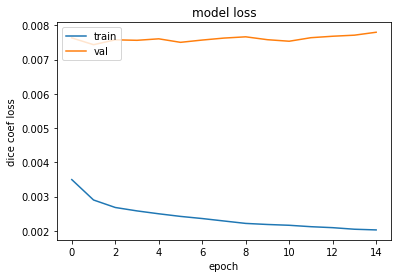

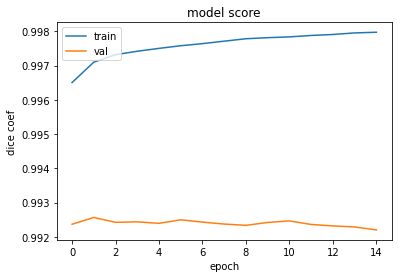

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('dice coef loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model score')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test

In [ ]:
model.compile(optimizer=Adam(lr=1e-5),loss=dice_coef_loss,metrics=[dice_coef])
model.load_weights('/content/drive/MyDrive/cs446_project/data/Model Checkpoints/yuw_weights_204.hdf5')

In [ ]:
#this part I will try to decide if the given model can correctly predict the result
# os.chdir('/content/drive/MyDrive/cs446_project')
def oneshot(index):
  print("假设输入是[H,W,D]")
  if index<10:
    valid_data = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/00' + str(index) + '_imgs.npy')
    valid_label = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/00' + str(index) + '_seg.npy')
  else:
    valid_data = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/0' + str(index) + '_imgs.npy')
    valid_label = np.load('/content/drive/MyDrive/cs446_project/data/data_pub/validation/0' + str(index) + '_seg.npy')
  print('shape of data and label:')
  channel, H, W, D = valid_data.shape
  print(valid_data.shape, valid_label.shape)

  # [4,H,W,D] -> [D,H,W,4]
  valid_data = np.swapaxes(valid_data, 0,3)
  #[D,H,W,4] -> [D,192,192,4]
  good_shape = padimage(valid_data, D, 192, 192)
  print('shape of padded data:')
  print(good_shape.shape)
  pred = np.argmax(model.predict(good_shape),axis=-1)

  print('shape of predicted data')
  print(pred.shape)
  # [D,192,192] -> [D,H,W]
  pred = cutimage(pred, D, H, W)

  #D,H,W -> H,W,D
  backshape = np.swapaxes(pred,0,1) #H,D,W
  backshape = np.swapaxes(backshape,1,2) #H,W,D

  print('shape of predicted after cut and swap')
  print(backshape.shape)


  # for d in range(D):
  #   print("the graph of the "+str(d)+"th slice")
  #   plt.imshow(backshape[:,:,d])
  #   plt.show()   

  cnt = np.zeros(5)
  cnt2 = np.zeros(5, dtype=int)
  correctness = np.zeros(2, dtype=int)
  for i in range(H):
    for j in range(W):
      for k in range(D):
        cnt[int(valid_label[i][j][k])] += 1
        cnt2[int(backshape[i][j][k])] += 1
        if backshape[i][j][k] == 0 and valid_label[i][j][k] == 0:
          correctness[0] += 1
        elif backshape[i][j][k] != 0 and valid_label[i][j][k] == backshape[i][j][k]:
          correctness[1] += 1
  print('cnt[i] means the nmber of i in it')
  print('cnt of valid_label')
  print(cnt)
  print('cnt of pred_label')
  print(cnt2)
  print('correct0 means numebr of both zero matched, correct1 means number of both one matched')
  print(correctness)

In [ ]:
oneshot(33)

假设输入是[H,W,D]
shape of data and label:
(4, 135, 174, 141) (135, 174, 141)
shape of padded data:
(141, 192, 192, 4)
shape of predicted data
(141, 192, 192)
shape of predicted after cut and swap
(135, 174, 141)
cnt[i] means the nmber of i in it
cnt of valid_label
[3124520.   21122.  129871.   36577.       0.]
cnt of pred_label
[3122433   14141  127329   48187       0]
correct0 means numebr of both zero matched, correct1 means number of both one matched
[3108059  153868]


In [ ]:
def getandsavepredict(index):
  test_data = np.load('./data/test_pub/test_pub/' + index + '_imgs.npy')
  channel, H, W, D = test_data.shape

  # [4,H,W,D] -> [D,H,W,4]
  test_data = np.swapaxes(test_data, 0,3)
  #[D,H,W,4] -> [D,192,192,4]
  good_shape = padimage(test_data, D, 192, 192)
  pred = np.argmax(model.predict(good_shape),axis=-1)

  # [D,192,192] -> [D,H,W]
  pred = cutimage(pred, D, H, W)
  #D,H,W -> H,W,D
  backshape = np.swapaxes(pred,0,1) #H,D,W
  backshape = np.swapaxes(backshape,1,2) #H,W,D


  np.save('./data/test_pub/test_pub/' + index + '_seg.npy',backshape)

In [ ]:
for i in range(1,69):
  print(i)
  if i < 10:
    getandsavepredict('00' + str(i))
  elif i < 100:
    getandsavepredict('0' + str(i))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


In [ ]:
import os
os.chdir('/content/drive/My Drive/cs446_project')
import create_submission
!python create_submission.py --seg-dir ./data/test_pub/test_pub  --out-csv-path full_img_5parts_submission.csv

100% 205/205 [00:08<00:00, 23.42it/s]


In [ ]:
model.save('/content/drive/MyDrive/cs446_project/data/Saved Models/5parts_model.h5',overwrite=True)